In [419]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [420]:
# CSV dosyasını yükleyelim (dosya yolunu uygun şekilde değiştirin)
train_df = pd.read_csv('train.csv')

C:\Users\seyfu\AppData\Local\Temp\ipykernel_17124\3045749985.py:2: DtypeWarning: Columns (13,15,19,30,32,37,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


In [421]:
# 1. Veri Setini İnceleme
print("Veri Seti İlk 5 Satır:")
print(train_df.head())

Veri Seti İlk 5 Satır:
   Basvuru Yili  Degerlendirme Puani Cinsiyet  Dogum Tarihi        Dogum Yeri  \
0          2014                 52.0    Erkek      4/6/1994  Altindag, Ankara   
1          2014                 30.0    Erkek     6/11/1993           Üsküdar   
2          2014                 18.0    Erkek     1/15/1986            Samsun   
3          2014                 40.0    Erkek      6/4/1991        Diyarbakır   
4          2014                 24.0    Erkek  2 Kasim 1992   Ankara/Altındağ   

  Ikametgah Sehri                    Universite Adi Universite Turu  \
0          Ankara           İHSAN DOĞRAMACI BİLKENT            Özel   
1        İstanbul           İHSAN DOĞRAMACI BİLKENT            Özel   
2        İstanbul  ULUSLARARASI KIBRIS ÜNİVERSİTESİ            Özel   
3        İstanbul       İSTANBUL ŞEHİR ÜNİVERSİTESİ            Özel   
4          Ankara          TURGUT ÖZAL ÜNİVERSİTESİ            Özel   

   Burslu ise Burs Yuzdesi Burs Aliyor mu?  ... Spor Dalindaki 

In [422]:
print("\nEksik Değerlerin Sayısı:")
print(train_df.isnull().sum())


Eksik Değerlerin Sayısı:
Basvuru Yili                                                     0
Degerlendirme Puani                                              1
Cinsiyet                                                       169
Dogum Tarihi                                                   177
Dogum Yeri                                                     791
Ikametgah Sehri                                               2037
Universite Adi                                                 132
Universite Turu                                                255
Burslu ise Burs Yuzdesi                                      42685
Burs Aliyor mu?                                                  0
Bölüm                                                          231
Universite Kacinci Sinif                                       374
Universite Not Ortalamasi                                     2753
Daha Once Baska Bir Universiteden Mezun Olmus                37345
Lise Adi                            

### 'Dogum Tarihi', 'Dogum Yeri', 'Lise Adi', 'Lise Adi Diger', 'Lise Bolum Diger', 'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite','id'
#### sütunlarını grafikten attım

In [423]:
columns_to_drop = ['Dogum Tarihi', 'Dogum Yeri', 'Lise Adi', 'Lise Adi Diger','Lise Sehir', 'Lise Bolum Diger', 'Lise Bolumu','Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite']
train_df = train_df.drop(columns=columns_to_drop)

In [424]:
train_df["Kardes Sayisi"]

0          1
1          1
2          6
3         10
4          1
        ... 
65120    4.0
65121    4.0
65122    3.0
65123    2.0
65124    2.0
Name: Kardes Sayisi, Length: 65125, dtype: object

In [425]:
train_df

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,...,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,id
0,2014,52.0,Erkek,Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,Bilgisayar Muhendisligi,3,...,Evet,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,0
1,2014,30.0,Erkek,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,Elektrik Elektronik Mühendisliği,3,...,Hayır,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,1
2,2014,18.0,Erkek,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,Finans Yönetimi ve Pazarlama,1,...,Hayır,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,2
3,2014,40.0,Erkek,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,Bilgisayar Mühendisliği,3,...,Hayır,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,3
4,2014,24.0,Erkek,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,Siyaset Bilimi ve Uluslararası ilişkiler,NaN,...,Hayır,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65120,2022,0.0,Erkek,İstanbul,İstanbul Aydın Üniversitesi,Özel,NaN,Evet,Muhasebe,2,...,Hayır,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,65120
65121,2022,0.0,Erkek,Muğla,Muğla Sıtkı Koçman Üniversitesi,Devlet,NaN,Hayır,Turizm İşletmeciliği,1,...,Hayır,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,65121
65122,2022,0.0,Erkek,Mersin,Süleyman Demirel Üniversitesi,Devlet,NaN,Hayır,Otomotiv Mühendisliği,4,...,Hayır,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,65122
65123,2022,0.0,Erkek,Samsun,Karabük Üniversitesi,Devlet,NaN,Hayır,Sanat Tarihi,3,...,Hayır,-,Hayır,-,NaN,Hayır,-,Hayır,NaN,65123


### 'Burs Aliyor mu?', 'Daha Once Baska Bir Universiteden Mezun Olmus', 'Baska Bir Kurumdan Burs Aliyor mu?', 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?','Profesyonel Bir Spor Daliyla Mesgul musunuz?', 'Aktif olarak bir STK üyesi misiniz?','Stk Projesine Katildiniz Mi?', 'Girisimcilikle Ilgili Deneyiminiz Var Mi?', 'Ingilizce Biliyor musunuz?'
#### cevabı sadece 2 farklı tür olan sütunları 0 ve 1 olarak encode ettim, NaN olanlar olduğu gibi kaldı


In [426]:
binary_columns = [
    'Burs Aliyor mu?', 'Daha Once Baska Bir Universiteden Mezun Olmus',
    'Baska Bir Kurumdan Burs Aliyor mu?', 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
    'Profesyonel Bir Spor Daliyla Mesgul musunuz?', 'Aktif olarak bir STK üyesi misiniz?',
    'Stk Projesine Katildiniz Mi?', 'Girisimcilikle Ilgili Deneyiminiz Var Mi?', 'Ingilizce Biliyor musunuz?'
]

train_df[binary_columns] = train_df[binary_columns].apply(lambda x: x.map({'Evet': 1, 'Hayır': 0}))

# Cinsiyet sütunu için Erkek ve Kadın değerlerini binary encoding yapalım
train_df['Cinsiyet'] = train_df['Cinsiyet'].map({'Erkek': 2, 'Kadın': 1, 'ERKEK': 2, 'KADIN': 1, 'Belirtmek istemiyorum':0}, na_action='ignore')

# Universite Turu sütunu için Özel ve Devlet değerlerini binary encoding yapalım
train_df['Universite Turu'] = train_df['Universite Turu'].map({'Özel': 1, 'Devlet': 0}, na_action='ignore')

In [427]:
train_df

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,...,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,id
0,2014,52.0,2.0,Ankara,İHSAN DOĞRAMACI BİLKENT,1.0,100.0,1.0,Bilgisayar Muhendisligi,3,...,1.0,Diğer,0.0,NaN,1.0,0.0,NaN,NaN,NaN,0
1,2014,30.0,2.0,İstanbul,İHSAN DOĞRAMACI BİLKENT,1.0,100.0,0.0,Elektrik Elektronik Mühendisliği,3,...,0.0,0,0.0,NaN,1.0,1.0,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,1
2,2014,18.0,2.0,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,1.0,100.0,0.0,Finans Yönetimi ve Pazarlama,1,...,0.0,0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
3,2014,40.0,2.0,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,1.0,100.0,1.0,Bilgisayar Mühendisliği,3,...,0.0,0,0.0,NaN,1.0,0.0,NaN,NaN,NaN,3
4,2014,24.0,2.0,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,1.0,100.0,1.0,Siyaset Bilimi ve Uluslararası ilişkiler,NaN,...,0.0,0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65120,2022,0.0,2.0,İstanbul,İstanbul Aydın Üniversitesi,1.0,NaN,1.0,Muhasebe,2,...,0.0,-,0.0,-,NaN,0.0,-,0.0,NaN,65120
65121,2022,0.0,2.0,Muğla,Muğla Sıtkı Koçman Üniversitesi,0.0,NaN,0.0,Turizm İşletmeciliği,1,...,0.0,-,0.0,-,NaN,0.0,-,0.0,NaN,65121
65122,2022,0.0,2.0,Mersin,Süleyman Demirel Üniversitesi,0.0,NaN,0.0,Otomotiv Mühendisliği,4,...,0.0,-,0.0,-,NaN,0.0,-,0.0,NaN,65122
65123,2022,0.0,2.0,Samsun,Karabük Üniversitesi,0.0,NaN,0.0,Sanat Tarihi,3,...,0.0,-,0.0,-,NaN,0.0,-,0.0,NaN,65123


In [428]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# LabelEncoder instance
label_encoder = LabelEncoder()

# İşlem yapmak istediğiniz kolonlar
columns_to_encode = [
    'Basvuru Yili', 'Ikametgah Sehri', 'Universite Adi', 'Burslu ise Burs Yuzdesi', 'Bölüm', 
    'Universite Kacinci Sinif', 'Universite Not Ortalamasi', 'Lise Turu', 'Lise Mezuniyet Notu',
    'Anne Egitim Durumu', 'Anne Calisma Durumu', 'Anne Sektor', 'Baba Egitim Durumu', 
    'Baba Calisma Durumu', 'Baba Sektor', 'Kardes Sayisi', 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
    'Spor Dalindaki Rolunuz Nedir?', 'Ingilizce Seviyeniz?'
]

# Her bir kolonu Label Encoding ile dönüştürme
for column in columns_to_encode:
    # NaN değerleri geçici olarak koruma
    train_df[column] = train_df[column].astype(str)  # NaN'leri korumak için tüm verileri str yapıyoruz
    train_df[column] = train_df[column].where(train_df[column] == 'NaN', label_encoder.fit_transform(train_df[column].astype(str)))


In [429]:
train_df

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,...,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,id
0,0,52.0,2.0,28,439,1.0,3,1.0,456,3,...,1,3,0.0,NaN,1.0,0.0,NaN,NaN,3,0
1,0,30.0,2.0,310,439,1.0,3,0.0,1247,3,...,0,1,0.0,NaN,1.0,1.0,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,3,1
2,0,18.0,2.0,310,387,1.0,3,0.0,1773,1,...,0,1,0.0,NaN,0.0,0.0,NaN,NaN,3,2
3,0,40.0,2.0,310,471,1.0,3,1.0,476,3,...,0,1,0.0,NaN,1.0,0.0,NaN,NaN,3,3
4,0,24.0,2.0,28,371,1.0,3,1.0,4090,12,...,0,1,0.0,NaN,0.0,0.0,NaN,NaN,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65120,8,0.0,2.0,310,491,1.0,51,1.0,3203,2,...,0,0,0.0,-,NaN,0.0,-,0.0,3,65120
65121,8,0.0,2.0,206,293,0.0,51,0.0,4614,1,...,0,0,0.0,-,NaN,0.0,-,0.0,3,65121
65122,8,0.0,2.0,202,354,0.0,51,0.0,3470,4,...,0,0,0.0,-,NaN,0.0,-,0.0,3,65122
65123,8,0.0,2.0,232,242,0.0,51,0.0,3883,3,...,0,0,0.0,-,NaN,0.0,-,0.0,3,65123


In [430]:
type_count_check = list()
for i in train_df["Kardes Sayisi"]:
    type_count_check.append(i)

type_count_check = set(type_count_check)
print(type_count_check)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28}


C:\Users\seyfu\AppData\Local\Temp\ipykernel_17124\231505242.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(train_df["Degerlendirme Puani"])


<Axes: xlabel='Degerlendirme Puani', ylabel='Density'>

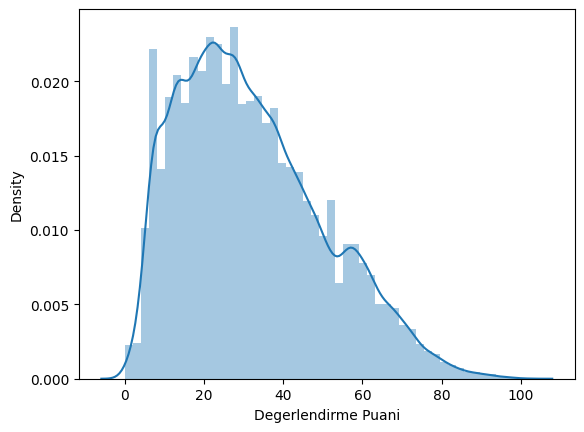

In [431]:
import seaborn as sbn

sbn.distplot(train_df["Degerlendirme Puani"])

In [432]:
# 'Uye Oldugunuz Kulubun Ismi' sütunundaki boş değerler için 0, dolu olanlar için 1 yazma
train_df['Uye Oldugunuz Kulubun Ismi'] = train_df['Uye Oldugunuz Kulubun Ismi'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)
train_df["Hangi STK'nin Uyesisiniz?"] = train_df["Hangi STK'nin Uyesisiniz?"].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)
train_df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'] = train_df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)
train_df["Burs Aldigi Baska Kurum"] = train_df["Burs Aldigi Baska Kurum"].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)

train_df

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,...,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,id
0,0,52.0,2.0,28,439,1.0,3,1.0,456,3,...,1,3,0.0,0,1.0,0.0,0,NaN,3,0
1,0,30.0,2.0,310,439,1.0,3,0.0,1247,3,...,0,1,0.0,0,1.0,1.0,1,NaN,3,1
2,0,18.0,2.0,310,387,1.0,3,0.0,1773,1,...,0,1,0.0,0,0.0,0.0,0,NaN,3,2
3,0,40.0,2.0,310,471,1.0,3,1.0,476,3,...,0,1,0.0,0,1.0,0.0,0,NaN,3,3
4,0,24.0,2.0,28,371,1.0,3,1.0,4090,12,...,0,1,0.0,0,0.0,0.0,0,NaN,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65120,8,0.0,2.0,310,491,1.0,51,1.0,3203,2,...,0,0,0.0,1,NaN,0.0,1,0.0,3,65120
65121,8,0.0,2.0,206,293,0.0,51,0.0,4614,1,...,0,0,0.0,1,NaN,0.0,1,0.0,3,65121
65122,8,0.0,2.0,202,354,0.0,51,0.0,3470,4,...,0,0,0.0,1,NaN,0.0,1,0.0,3,65122
65123,8,0.0,2.0,232,242,0.0,51,0.0,3883,3,...,0,0,0.0,1,NaN,0.0,1,0.0,3,65123


In [433]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Her sütun için farklı stratejiler tanımlayarak eksik değerleri dolduralım
for column in train_df.columns:
    # Eğer sütun numerik ise ortalama (mean) ile doldur
    if train_df[column].dtype in ['float64', 'int64']:
        imputer = SimpleImputer(strategy='mean')  # Alternatif olarak median kullanabilirsiniz: strategy='median'
        train_df[[column]] = imputer.fit_transform(train_df[[column]])
    
    # Eğer sütun kategorik ise en sık (mode) ile doldur
    elif train_df[column].dtype == 'object':
        imputer = SimpleImputer(strategy='most_frequent')
        train_df[[column]] = imputer.fit_transform(train_df[[column]])


train_df

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,...,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,id
0,0,52.000000,2.0,28,439,1.0,3,1.0,456,3,...,1,3,0.0,0.0,1.00000,0.0,0.0,0.832984,3,0.0
1,0,30.000000,2.0,310,439,1.0,3,0.0,1247,3,...,0,1,0.0,0.0,1.00000,1.0,1.0,0.832984,3,1.0
2,0,18.000000,2.0,310,387,1.0,3,0.0,1773,1,...,0,1,0.0,0.0,0.00000,0.0,0.0,0.832984,3,2.0
3,0,40.000000,2.0,310,471,1.0,3,1.0,476,3,...,0,1,0.0,0.0,1.00000,0.0,0.0,0.832984,3,3.0
4,0,24.000000,2.0,28,371,1.0,3,1.0,4090,12,...,0,1,0.0,0.0,0.00000,0.0,0.0,0.832984,3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65120,8,0.000000,2.0,310,491,1.0,51,1.0,3203,2,...,0,0,0.0,1.0,0.46598,0.0,1.0,0.000000,3,65120.0
65121,8,0.000000,2.0,206,293,0.0,51,0.0,4614,1,...,0,0,0.0,1.0,0.46598,0.0,1.0,0.000000,3,65121.0
65122,8,0.000000,2.0,202,354,0.0,51,0.0,3470,4,...,0,0,0.0,1.0,0.46598,0.0,1.0,0.000000,3,65122.0
65123,8,0.000000,2.0,232,242,0.0,51,0.0,3883,3,...,0,0,0.0,1.0,0.46598,0.0,1.0,0.000000,3,65123.0


In [434]:
import re

def extract_numeric_value(text):
    # Regex ile metin içindeki sayısal değerleri bul
    match = re.search(r'(\d+)', text)
    if match:
        # İlk bulduğumuz sayısal değeri döndür
        return int(match.group(1))
    return None

# 'Baska Kurumdan Aldigi Burs Miktari' sütunundaki sayısal değerleri çıkarmak için
train_df['Burs Miktari'] = train_df['Baska Kurumdan Aldigi Burs Miktari'].apply(extract_numeric_value)

columns_to_drop = ['Baska Kurumdan Aldigi Burs Miktari']
train_df = train_df.drop(columns=columns_to_drop)

train_df['Burs Miktari'] = train_df['Burs Miktari'].fillna(0)

train_df

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,id,Burs Miktari
0,0,52.000000,2.0,28,439,1.0,3,1.0,456,3,...,3,0.0,0.0,1.00000,0.0,0.0,0.832984,3,0.0,0.0
1,0,30.000000,2.0,310,439,1.0,3,0.0,1247,3,...,1,0.0,0.0,1.00000,1.0,1.0,0.832984,3,1.0,0.0
2,0,18.000000,2.0,310,387,1.0,3,0.0,1773,1,...,1,0.0,0.0,0.00000,0.0,0.0,0.832984,3,2.0,0.0
3,0,40.000000,2.0,310,471,1.0,3,1.0,476,3,...,1,0.0,0.0,1.00000,0.0,0.0,0.832984,3,3.0,0.0
4,0,24.000000,2.0,28,371,1.0,3,1.0,4090,12,...,1,0.0,0.0,0.00000,0.0,0.0,0.832984,3,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65120,8,0.000000,2.0,310,491,1.0,51,1.0,3203,2,...,0,0.0,1.0,0.46598,0.0,1.0,0.000000,3,65120.0,0.0
65121,8,0.000000,2.0,206,293,0.0,51,0.0,4614,1,...,0,0.0,1.0,0.46598,0.0,1.0,0.000000,3,65121.0,0.0
65122,8,0.000000,2.0,202,354,0.0,51,0.0,3470,4,...,0,0.0,1.0,0.46598,0.0,1.0,0.000000,3,65122.0,500.0
65123,8,0.000000,2.0,232,242,0.0,51,0.0,3883,3,...,0,0.0,1.0,0.46598,0.0,1.0,0.000000,3,65123.0,0.0


In [435]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# 1. Veri seti hakkında genel bilgi
print("Veri seti boyutu:", train_df.shape)
print("\nVeri seti bilgisi:")
print(train_df.info())

# 2. Eksik değerleri kontrol et
print("\nEksik değerler:")
print(train_df.isnull().sum())

# 3. Kategorik ve sayısal sütunları ayır
categorical_columns = train_df.select_dtypes(include=['object']).columns
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

print("\nKategorik sütunlar:", categorical_columns.tolist())
print("Sayısal sütunlar:", numerical_columns.tolist())

# 4. Kategorik sütunları doldur (en sık değer ile)
for col in categorical_columns:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

# 5. Sayısal sütunları doldur (ortalama ile)
for col in numerical_columns:
    train_df[col].fillna(train_df[col].mean(), inplace=True)

# 6. Kategorik verileri sayısallaştır
le = LabelEncoder()
for col in categorical_columns:
    train_df[col] = le.fit_transform(train_df[col].astype(str))

# 7. Tüm verileri ölçeklendir
scaler = MinMaxScaler()
train_df_scaled = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

# 8. Sonuçları göster
print("\nİşlem sonrası eksik değerler:")
print(train_df.isnull().sum())

print("\nÖlçeklendirilmiş veri seti özeti:")
print(train_df_scaled.describe())

print("\nÖlçeklendirilmiş veri setinden ilk 5 satır:")
print(train_df_scaled.head())


Veri seti boyutu: (65125, 36)

Veri seti bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 36 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  object 
 1   Degerlendirme Puani                                        65125 non-null  float64
 2   Cinsiyet                                                   65125 non-null  float64
 3   Ikametgah Sehri                                            65125 non-null  object 
 4   Universite Adi                                             65125 non-null  object 
 5   Universite Turu                                            65125 non-null  float64
 6   Burslu ise Burs Yuzdesi                                    65125 non-null  object 
 7   Burs Aliyor mu?                             

C:\Users\seyfu\AppData\Local\Temp\ipykernel_17124\2271289295.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
C:\Users\seyfu\AppData\Local\Temp\ipykernel_17124\2271289295.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c


İşlem sonrası eksik değerler:
Basvuru Yili                                                 0
Degerlendirme Puani                                          0
Cinsiyet                                                     0
Ikametgah Sehri                                              0
Universite Adi                                               0
Universite Turu                                              0
Burslu ise Burs Yuzdesi                                      0
Burs Aliyor mu?                                              0
Bölüm                                                        0
Universite Kacinci Sinif                                     0
Universite Not Ortalamasi                                    0
Daha Once Baska Bir Universiteden Mezun Olmus                0
Lise Turu                                                    0
Lise Mezuniyet Notu                                          0
Baska Bir Kurumdan Burs Aliyor mu?                           0
Burs Aldigi Baska Kurum 

In [436]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Object tipindeki sütunları bul
object_columns = train_df.select_dtypes(include=['object']).columns

# LabelEncoder nesnesi oluştur
le = LabelEncoder()

# Her bir object sütunu için:
for col in object_columns:
    # Önce LabelEncoder ile sayısallaştır
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    
    # Sonra float tipine çevir
    train_df[col] = train_df[col].astype(float)

# Sonuçları kontrol et
print(train_df.dtypes)

Basvuru Yili                                                   int64
Degerlendirme Puani                                          float64
Cinsiyet                                                     float64
Ikametgah Sehri                                                int64
Universite Adi                                                 int64
Universite Turu                                              float64
Burslu ise Burs Yuzdesi                                        int64
Burs Aliyor mu?                                              float64
Bölüm                                                          int64
Universite Kacinci Sinif                                       int64
Universite Not Ortalamasi                                      int64
Daha Once Baska Bir Universiteden Mezun Olmus                float64
Lise Turu                                                      int64
Lise Mezuniyet Notu                                            int64
Baska Bir Kurumdan Burs Aliyor mu?

In [437]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Veri setlerini yükleme
test_df = pd.read_csv('test_x.csv')

# Eğitim verilerini hazırlama
X = train_df.drop(['Degerlendirme Puani', 'Basvuru Yili'], axis=1)
y = train_df['Degerlendirme Puani']

# Test verilerini hazırlama
test_id = test_df['id']
test_features = test_df.drop('id', axis=1)

# Kategorik değişkenleri one-hot encoding ile dönüştürme
X = pd.get_dummies(X)
test_features = pd.get_dummies(test_features)

# Eğitim ve test setlerinin sütunlarını eşleştirme
common_columns = X.columns.intersection(test_features.columns)
X = X[common_columns]
test_features = test_features[common_columns]

# Verileri ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_features)

# Modeli eğitme
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Test seti üzerinde tahmin yapma
predictions = model.predict(test_scaled)

# Sonuçları kaydetme
submission = pd.DataFrame({
    'id': test_id,
    'Degerlendirme Puani': predictions
})

submission.to_csv('submission.csv', index=False)

print("Tahminler 'submission.csv' dosyasına kaydedildi.")

# Modeli kaydetme (isteğe bağlı)
joblib.dump(model, 'random_forest_model.joblib')
print("Model 'random_forest_model.joblib' olarak kaydedildi.")

Tahminler 'submission.csv' dosyasına kaydedildi.
Model 'random_forest_model.joblib' olarak kaydedildi.


In [438]:
import pandas as pd
import numpy as np

# CSV dosyasını okuyalım
df = pd.read_csv('submission.csv')

# Değerlendirme Puanı'nı yuvarlayalım ve 10'un katı yapalım
df['Degerlendirme Puani'] = np.round(df['Degerlendirme Puani'] / 10) * 10

# Sonucu tekrar CSV olarak kaydedelim
df.to_csv('submission_rounded.csv', index=False)

print("Yuvarlanmış puanlar 'submission_rounded.csv' dosyasına kaydedildi.")

# İlk birkaç satırı gösterelim
print(df.head(10))

Yuvarlanmış puanlar 'submission_rounded.csv' dosyasına kaydedildi.
   id  Degerlendirme Puani
0   0                 30.0
1   1                 30.0
2   2                 40.0
3   3                 30.0
4   4                 30.0
5   5                 30.0
6   6                 30.0
7   7                 30.0
8   8                 30.0
9   9                 30.0


# rounded olanlar daha yüksek accuracy skora sahip oluyor

In [ ]:
main.ipynb = "# Gerekli kütüphaneleri import edelim 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# CSV dosyasını yükleyelim (dosya yolunu uygun şekilde değiştirin)
train_df = pd.read_csv('train.csv')

# 1. Veri Setini İnceleme
print("Veri Seti İlk 5 Satır:")
print(train_df.head())

print("\nEksik Değerlerin Sayısı:")
print(train_df.isnull().sum())

columns_to_drop = ['Dogum Tarihi', 'Dogum Yeri', 'Lise Adi', 'Lise Adi Diger','Lise Sehir', 'Lise Bolum Diger', 'Lise Bolumu','Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite']
train_df = train_df.drop(columns=columns_to_drop)

train_df["Kardes Sayisi"]

binary_columns = [
    'Burs Aliyor mu?', 'Daha Once Baska Bir Universiteden Mezun Olmus',
    'Baska Bir Kurumdan Burs Aliyor mu?', 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
    'Profesyonel Bir Spor Daliyla Mesgul musunuz?', 'Aktif olarak bir STK üyesi misiniz?',
    'Stk Projesine Katildiniz Mi?', 'Girisimcilikle Ilgili Deneyiminiz Var Mi?', 'Ingilizce Biliyor musunuz?'
]

train_df[binary_columns] = train_df[binary_columns].apply(lambda x: x.map({'Evet': 1, 'Hayır': 0}))

# Cinsiyet sütunu için Erkek ve Kadın değerlerini binary encoding yapalım
train_df['Cinsiyet'] = train_df['Cinsiyet'].map({'Erkek': 2, 'Kadın': 1, 'ERKEK': 2, 'KADIN': 1, 'Belirtmek istemiyorum':0}, na_action='ignore')

# Universite Turu sütunu için Özel ve Devlet değerlerini binary encoding yapalım
train_df['Universite Turu'] = train_df['Universite Turu'].map({'Özel': 1, 'Devlet': 0}, na_action='ignore')

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# LabelEncoder instance
label_encoder = LabelEncoder()

# İşlem yapmak istediğiniz kolonlar
columns_to_encode = [
    'Basvuru Yili', 'Ikametgah Sehri', 'Universite Adi', 'Burslu ise Burs Yuzdesi', 'Bölüm', 
    'Universite Kacinci Sinif', 'Universite Not Ortalamasi', 'Lise Turu', 'Lise Mezuniyet Notu',
    'Anne Egitim Durumu', 'Anne Calisma Durumu', 'Anne Sektor', 'Baba Egitim Durumu', 
    'Baba Calisma Durumu', 'Baba Sektor', 'Kardes Sayisi', 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
    'Spor Dalindaki Rolunuz Nedir?', 'Ingilizce Seviyeniz?'
]

# Her bir kolonu Label Encoding ile dönüştürme
for column in columns_to_encode:
    # NaN değerleri geçici olarak koruma
    train_df[column] = train_df[column].astype(str)  # NaN'leri korumak için tüm verileri str yapıyoruz
    train_df[column] = train_df[column].where(train_df[column] == 'NaN', label_encoder.fit_transform(train_df[column].astype(str)))


type_count_check = list()
for i in train_df["Kardes Sayisi"]:
    type_count_check.append(i)

type_count_check = set(type_count_check)
print(type_count_check)

import seaborn as sbn

sbn.distplot(train_df["Degerlendirme Puani"])

# 'Uye Oldugunuz Kulubun Ismi' sütunundaki boş değerler için 0, dolu olanlar için 1 yazma
train_df['Uye Oldugunuz Kulubun Ismi'] = train_df['Uye Oldugunuz Kulubun Ismi'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)
train_df["Hangi STK'nin Uyesisiniz?"] = train_df["Hangi STK'nin Uyesisiniz?"].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)
train_df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'] = train_df['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)
train_df["Burs Aldigi Baska Kurum"] = train_df["Burs Aldigi Baska Kurum"].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)

train_df

from sklearn.impute import SimpleImputer
import pandas as pd

# Her sütun için farklı stratejiler tanımlayarak eksik değerleri dolduralım
for column in train_df.columns:
    # Eğer sütun numerik ise ortalama (mean) ile doldur
    if train_df[column].dtype in ['float64', 'int64']:
        imputer = SimpleImputer(strategy='mean')  # Alternatif olarak median kullanabilirsiniz: strategy='median'
        train_df[[column]] = imputer.fit_transform(train_df[[column]])
    
    # Eğer sütun kategorik ise en sık (mode) ile doldur
    elif train_df[column].dtype == 'object':
        imputer = SimpleImputer(strategy='most_frequent')
        train_df[[column]] = imputer.fit_transform(train_df[[column]])


train_df

import re

def extract_numeric_value(text):
    # Regex ile metin içindeki sayısal değerleri bul
    match = re.search(r'(\d+)', text)
    if match:
        # İlk bulduğumuz sayısal değeri döndür
        return int(match.group(1))
    return None

# 'Baska Kurumdan Aldigi Burs Miktari' sütunundaki sayısal değerleri çıkarmak için
train_df['Burs Miktari'] = train_df['Baska Kurumdan Aldigi Burs Miktari'].apply(extract_numeric_value)

columns_to_drop = ['Baska Kurumdan Aldigi Burs Miktari']
train_df = train_df.drop(columns=columns_to_drop)

train_df['Burs Miktari'] = train_df['Burs Miktari'].fillna(0)

train_df


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# 1. Veri seti hakkında genel bilgi
print("Veri seti boyutu:", train_df.shape)
print("\nVeri seti bilgisi:")
print(train_df.info())

# 2. Eksik değerleri kontrol et
print("\nEksik değerler:")
print(train_df.isnull().sum())

# 3. Kategorik ve sayısal sütunları ayır
categorical_columns = train_df.select_dtypes(include=['object']).columns
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

print("\nKategorik sütunlar:", categorical_columns.tolist())
print("Sayısal sütunlar:", numerical_columns.tolist())

# 4. Kategorik sütunları doldur (en sık değer ile)
for col in categorical_columns:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

# 5. Sayısal sütunları doldur (ortalama ile)
for col in numerical_columns:
    train_df[col].fillna(train_df[col].mean(), inplace=True)

# 6. Kategorik verileri sayısallaştır
le = LabelEncoder()
for col in categorical_columns:
    train_df[col] = le.fit_transform(train_df[col].astype(str))

# 7. Tüm verileri ölçeklendir
scaler = MinMaxScaler()
train_df_scaled = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

# 8. Sonuçları göster
print("\nİşlem sonrası eksik değerler:")
print(train_df.isnull().sum())

print("\nÖlçeklendirilmiş veri seti özeti:")
print(train_df_scaled.describe())

print("\nÖlçeklendirilmiş veri setinden ilk 5 satır:")
print(train_df_scaled.head())


import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Object tipindeki sütunları bul
object_columns = train_df.select_dtypes(include=['object']).columns

# LabelEncoder nesnesi oluştur
le = LabelEncoder()

# Her bir object sütunu için:
for col in object_columns:
    # Önce LabelEncoder ile sayısallaştır
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    
    # Sonra float tipine çevir
    train_df[col] = train_df[col].astype(float)

# Sonuçları kontrol et
print(train_df.dtypes)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Veri setlerini yükleme
test_df = pd.read_csv('test_x.csv')

# Eğitim verilerini hazırlama
X = train_df.drop(['Degerlendirme Puani', 'Basvuru Yili'], axis=1)
y = train_df['Degerlendirme Puani']

# Test verilerini hazırlama
test_id = test_df['id']
test_features = test_df.drop('id', axis=1)

# Kategorik değişkenleri one-hot encoding ile dönüştürme
X = pd.get_dummies(X)
test_features = pd.get_dummies(test_features)

# Eğitim ve test setlerinin sütunlarını eşleştirme
common_columns = X.columns.intersection(test_features.columns)
X = X[common_columns]
test_features = test_features[common_columns]

# Verileri ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_features)

# Modeli eğitme
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Test seti üzerinde tahmin yapma
predictions = model.predict(test_scaled)

# Sonuçları kaydetme
submission = pd.DataFrame({
    'id': test_id,
    'Degerlendirme Puani': predictions
})

submission.to_csv('submission.csv', index=False)

print("Tahminler 'submission.csv' dosyasına kaydedildi.")

# Modeli kaydetme (isteğe bağlı)
joblib.dump(model, 'random_forest_model.joblib')
print("Model 'random_forest_model.joblib' olarak kaydedildi.")"